# Machine Performance Data Analysis for Smart Manufacturing Practice

Tableau URL (Visualization):

https://public.tableau.com/views/Book2_17478196612950/MachinePerformanceinTheFactory?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

# I. Introduction

In this program, a comprehensive data analysis project focused on evaluating production efficiency and energy consumption in smart manufacturing. Through this project, the goal is to apply statistical methods and data visualization techniques to extract meaningful insights from the dataset, which will support decision-making for improving manufacturing processes.

# II. Problem Statement and Dataset Description

2.1. Problem Topic

Analysis of Production Efficiency and Energy Consumption in Smart Manufacturing.

2.2. Background

In the manufacturing industry, production processes are critical to achieving maximum output with high quality and low operational costs. Energy consumption is a major cost driver in manufacturing operations and plays a significant role in overall efficiency. Moreover, good product quality with low defect, sustainability and waste reduction have become key focuses in Industry 4.0. By studying historical operational data, companies can identify patterns and opportunities to enhance performance. With statistical analysis and data visualization, data-driven decisions can be made to optimize production processes, making them smarter, more efficient, and environmentally friendly.

2.3. Problem Statement

Specific: Focused on energy consumption and defect data from machines in dataset.

Measurable: Uses clear metrics such as total and average energy and defect, and also their correlation.

Achievable:	Feasible using available dataset, statistical analysis and visualization by using Python and Tableau.

Relevant: Addresses real operational and quality issues in smart manufacturing environments.

Time-bound:	Analysis is scoped within a monthly dataset.

To identify inefficiencies and opportunities for improvement in a smart manufacturing process by analyzing one month of machine-level data on energy consumption, defects by using statistical methods and visualizations to detect measure performance and evaluate correlations, and test if machine differences significantly affect energy use and defect rates.



2.4. Dataset Source

Dataset URL: https://www.kaggle.com/datasets/ziya07/smart-manufacturing-resource-efficiency-dataset

Dataset Description:
This dataset provides a comprehensive snapshot of smart manufacturing operations, focusing on sustainability and process optimization. It supports analysis for improving energy efficiency, minimizing material waste, and enhancing production quality within Industry 4.0 frameworks. The dataset is ideal for developing intelligent control strategies, predictive maintenance models, and reinforcement learning applications in manufacturing.

2.5 Problem Analysis Description

The analysis will address the following key questions using statistical methods and data visualization:
1. Are there any outliers in energy consumption and defect datas?
2. Which machine has the highest total performance (output) in a month?
3. Which machine consumes the most energy in total per month?
4. Which machine consumes the most average energy?
5. Which machine produce the most average defect?
6. Are there any correlation between energy product output and energy consumption, also product output and defect?
7. Are energy and defect significantly affected by machine?





# III. Data Loading

In [ ]:
# Import Laibraries

import pandas as pd
from scipy import stats
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

In [25]:
# Import data from CSV file

file_path = "/Users/ilhamwahdini/p0-ftds043-rmt-m1-ilham8693/P0M1_ilham_wahdini_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Timestamp,Machine ID,Material Category,Material Name,Quantity Used (kg),Recycled Material (%),Energy Consumption (kWh),Production Output (Units),Defect Rate (%)
0,2025-05-01 08:00:00,M002,Raw Material,Polypropylene,86.73,0.0,96.74,204,3.38
1,2025-05-01 08:05:00,M009,Raw Material,Cotton,54.77,0.0,91.24,338,2.53
2,2025-05-01 08:10:00,M001,Hazardous Material,Lead-Based Alloy,157.40,0.0,164.16,529,1.10
3,2025-05-01 08:15:00,M010,Process Additive,Industrial Oil,163.82,0.0,99.16,532,1.70
4,2025-05-01 08:20:00,M003,Intermediate Material,Plastic Resin,65.33,0.0,125.59,467,4.24


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  10000 non-null  object 
 1   Machine ID                 10000 non-null  object 
 2   Material Category          10000 non-null  object 
 3   Material Name              10000 non-null  object 
 4   Quantity Used (kg)         10000 non-null  float64
 5   Recycled Material (%)      10000 non-null  float64
 6   Energy Consumption (kWh)   10000 non-null  float64
 7   Production Output (Units)  10000 non-null  int64  
 8   Defect Rate (%)            10000 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 703.3+ KB


Result above provide dataset information such as columns, row, null data and also type of data. There is no null data. All data types are correct except `Timestamp` that is still object type.

# IV. Data Cleaning

In [27]:
# 1. Duplicates Handling

initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"Deleted duplicate data: {initial_rows - df.shape[0]}")

Deleted duplicate data: 0


From result above there is no duplicate data in dataset.

In [28]:
# 2. Checking strange data (negative) in numeric datas

numeric_cols = ['Quantity Used (kg)', 'Recycled Material (%)', 'Energy Consumption (kWh)', 'Production Output (Units)', 'Defect Rate (%)']

for col in numeric_cols:
    if (df[col] < 0).any():
        print(f"There is negative value in {col}")
    else:
        print(f"No negative value in {col}.")

No negative value in Quantity Used (kg).
No negative value in Recycled Material (%).
No negative value in Energy Consumption (kWh).
No negative value in Production Output (Units).
No negative value in Defect Rate (%).


From result above there is on negative value in dataset.

In [29]:
# 3. Data Type Handling

# Change 'Timestamp' data type

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  10000 non-null  datetime64[ns]
 1   Machine ID                 10000 non-null  object        
 2   Material Category          10000 non-null  object        
 3   Material Name              10000 non-null  object        
 4   Quantity Used (kg)         10000 non-null  float64       
 5   Recycled Material (%)      10000 non-null  float64       
 6   Energy Consumption (kWh)   10000 non-null  float64       
 7   Production Output (Units)  10000 non-null  int64         
 8   Defect Rate (%)            10000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 703.3+ KB


From the info above, `Timestamp` data type has been changed from object to datetime.

# V. Exploration and Analysis

1. Outlier analysis in datas

In [30]:
# Energy Consumption

mean = df['Energy Consumption (kWh)'].mean()
median = df['Energy Consumption (kWh)'].median()
mode = df['Energy Consumption (kWh)'].mode()[0]
skew_val = skew(df['Energy Consumption (kWh)'])
kurt_val = kurtosis(df['Energy Consumption (kWh)'])

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Skewness: {skew_val:.2f}")
print(f"Kurtosis: {kurt_val:.2f}")

Mean: 140.11
Median: 140.31
Mode: 98.50
Skewness: -0.01
Kurtosis: -1.19


Important to check the outlier for `Energy Consumption` since this data will be analzed further. The result above, Skewness is very close to 0, which means the distribution is approximately symmetric, or close to normal. Since it's slightly negative, the left tail might be slightly longer, but the skewness is so small it's practically negligible. A negative kurtosis (less than 0) indicates fewer outliers, so no need to conduct further outlier handling.

In [31]:
# Depect

mean = df['Defect Rate (%)'].mean()
median = df['Defect Rate (%)'].median()
mode = df['Defect Rate (%)'].mode()[0]
skew_val = skew(df['Defect Rate (%)'])
kurt_val = kurtosis(df['Defect Rate (%)'])

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Skewness: {skew_val:.2f}")
print(f"Kurtosis: {kurt_val:.2f}")

Mean: 2.53
Median: 2.54
Mode: 2.34
Skewness: -0.03
Kurtosis: -1.19


Also important to check the outlier for `Defect` since this data will be analzed further.The result above, Skewness is very close to 0, which means the distribution is approximately symmetric, but a little bit negative so also slightly to the left. Kurtosis is also less than 0, it indicates fewer outliers.

2. Machine performance based on total product

In [32]:
df.groupby(['Machine ID'])['Production Output (Units)'].sum().reset_index()

,Machine ID,Production Output (Units)
0,M001,558576
1,M002,560642
2,M003,529879
3,M004,548752
4,M005,556393
5,M006,562342
6,M007,586865
7,M008,528862
8,M009,551548
9,M010,550956


<Axes: ylabel='Machine ID'>

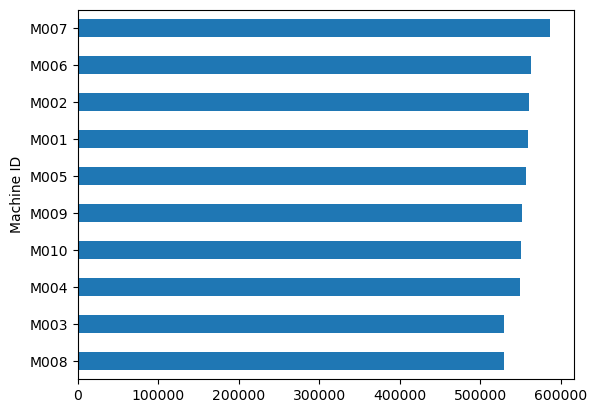

In [33]:
df.groupby(['Machine ID'])['Production Output (Units)'].sum().sort_values().plot(kind='barh')

Based on Bar Chart, The highest total `Production Output` is machine with `Machine ID` `M007`, and the lowest is `M008`.

3. Machine performance based on total energy consumed

In [34]:
df.groupby(['Machine ID'])['Energy Consumption (kWh)'].sum().reset_index()

,Machine ID,Energy Consumption (kWh)
0,M001,139700.79
1,M002,140654.92
2,M003,136286.32
3,M004,138501.80
4,M005,143595.01
5,M006,141844.12
6,M007,146816.53
7,M008,134084.51
8,M009,139297.66
9,M010,140337.35


<Axes: ylabel='Machine ID'>

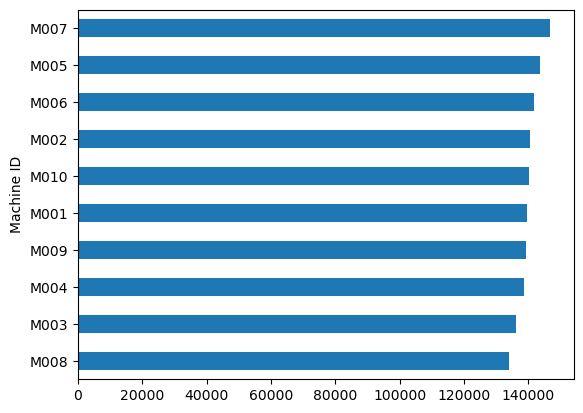

In [35]:
df.groupby(['Machine ID'])['Energy Consumption (kWh)'].sum().sort_values().plot(kind='barh')

Based on Bar Chart, The highest total `Energy Consumption` is machine with `Machine ID` `M007`, and the lowest is `M008`.

4. Machine performance based on average energy consumed

In [36]:
# Frequency of machine use

machine_freq = df['Machine ID'].value_counts()
machine_freq

Machine ID
M007    1041
M006    1020
M002    1007
M005    1004
M001    1002
M009    1000
M010     994
M004     994
M008     974
M003     964
Name: count, dtype: int64

Data above tells the frequency of the machine use in dataset. because they have different frequency value. To see machine performace, need to do mean/average.

In [37]:
mean_df = df.groupby(['Machine ID'])['Energy Consumption (kWh)'].mean().reset_index()
mean_df

,Machine ID,Energy Consumption (kWh)
0,M001,139.421946
1,M002,139.677180
2,M003,141.375851
3,M004,139.337827
4,M005,143.022918
5,M006,139.062863
6,M007,141.034131
7,M008,137.663768
8,M009,139.297660
9,M010,141.184457


<Axes: ylabel='Machine ID'>

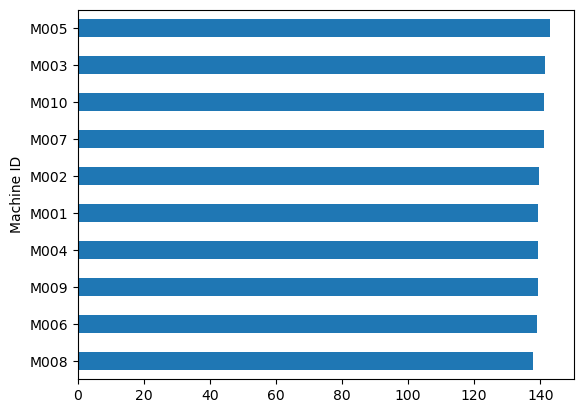

In [38]:
df.groupby(['Machine ID'])['Energy Consumption (kWh)'].mean().sort_values().plot(kind='barh')

In [39]:
# Calculate the reduction possibility from Energy Consumption

max_mean = mean_df['Energy Consumption (kWh)'].max()
min_mean = mean_df['Energy Consumption (kWh)'].min()
percentage_drop = ((max_mean - min_mean) / max_mean) * 100

print(f"Percentage of reduction possibility from Energy Consumption: {percentage_drop:.2f}%")

Percentage of reduction possibility from Energy Consumption: 3.75%


Based on Bar Chart above, The highest average `Energy Consumption` is machine with `Machine ID` `M005`, and the lowest is `M008`. It means M008 has best performance among all in term of saving energy. Based on this analysis others machine should refer to M008 performance esspecialy M005. In that case the reduction possibility from `Energy Consumption` for M005 is 3.75%. To do that can do benchmarking against M008 and conduct technical peformance comparison such as Operating conditions, Maintenance schedules, Load capacity and usage patterns, Component wear or calibration settings.

5. Machine performance based on average defect

In [40]:
mean_df = df.groupby(['Machine ID'])['Defect Rate (%)'].mean().reset_index()
mean_df

,Machine ID,Defect Rate (%)
0,M001,2.553074
1,M002,2.489484
2,M003,2.515228
3,M004,2.544286
4,M005,2.585867
5,M006,2.516882
6,M007,2.472920
7,M008,2.481201
8,M009,2.573530
9,M010,2.538139


<Axes: ylabel='Machine ID'>

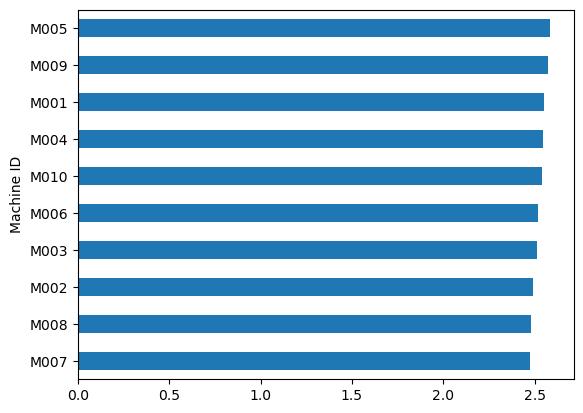

In [41]:
df.groupby(['Machine ID'])['Defect Rate (%)'].mean().sort_values().plot(kind='barh')

In [42]:
# Calculate the reduction possibility from Defect

max_mean = mean_df['Defect Rate (%)'].max()
min_mean = mean_df['Defect Rate (%)'].min()
percentage_drop = ((max_mean - min_mean) / max_mean) * 100

print(f"Percentage of reduction possibility from Defect: {percentage_drop:.2f}%")

Percentage of reduction possibility from Defect: 4.37%


Based on Bar Chart above, The highest average `Defect` is machine with `Machine ID` `M005`, and the lowest is `M007`. It means M007 has best performance among all in term of defect result. Based on this analysis others machine should refer to M007 performance esspecialy M005. In that case the reduction possibility from `Defect` for M005 is 4.37%. To do that can do benchmarking against M007 and conduct technical peformance comparison such as Operating conditions, Maintenance schedules, Load capacity and usage patterns, Component wear or calibration settings.

6. Correlation with product output

In [43]:
df[['Production Output (Units)', 'Energy Consumption (kWh)', 'Defect Rate (%)']].head()

,Production Output (Units),Energy Consumption (kWh),Defect Rate (%)
0,204,96.74,3.38
1,338,91.24,2.53
2,529,164.16,1.10
3,532,99.16,1.70
4,467,125.59,4.24


In [44]:
corr_r_kwh, pval_p_kwh = stats.pearsonr(df['Production Output (Units)'], df['Energy Consumption (kWh)'])
corr_r_d, pval_p_d = stats.pearsonr(df['Production Output (Units)'], df['Defect Rate (%)'])

print(f"For Energy Consumption, r-correlation: {corr_r_kwh:.4f}, p-value: {pval_p_kwh:.4f}")
print(f"For Defect, r-correlation: {corr_r_d:.4f}, p-value: {pval_p_d:.4f}")

For Energy Consumption, r-correlation: -0.0017, p-value: 0.8681
For Defect, r-correlation: 0.0092, p-value: 0.3565


Result above is correlation calculation using Pearson (r), because there is not many outlier. For `Energy Consumption`, it indicates a very weak negative correlation between energy consumption and product output, we can say essentially no meaningful relationship. For `Defect`, it also shows a very weak positive correlation, which again implies no meaningful association between the number of defects and the number of products produced.

7. Machine affecting performace

In [45]:
df['Machine ID'].unique()

array(['M002', 'M009', 'M001', 'M010', 'M003', 'M005', 'M004', 'M006',
       'M008', 'M007'], dtype=object)

Above is the list for all machines.

In [46]:
energy_list = []
defect_list = []

for i in range(1, 11):
    
    machine_data = df['Energy Consumption (kWh)'][df['Machine ID'] == f'M{i:03}']
    energy_list.append(machine_data)

    machine_data = df['Defect Rate (%)'][df['Machine ID'] == f'M{i:03}']
    defect_list.append(machine_data)
                                   
res_kwh = stats.f_oneway(*energy_list)
res_d = stats.f_oneway(*defect_list)

print(f'For Energy Consumption, P-value: {res_kwh.pvalue:.4f}')
print(f'For Defect, P-value: {res_d.pvalue:.4f}')

For Energy Consumption, P-value: 0.0404
For Defect, P-value: 0.6909


Above result is Inferential Analysis by Machine ID with ANOVA:

1. Effect of Machine ID on Energy Consumption

H0: There is no significant difference in energy consumption among machines.

H1: There is a significant difference in energy consumption among machines.

Since p < 0.05, we reject the null hypothesis. There is a statistically significant difference in energy consumption between machines. Some machines clearly consume more energy than others, not by random chance. So all machine should refer to the best machine as defult. To do that can do benchmarking against best machine and conduct technical peformance comparison such as Operating conditions, Maintenance schedules, Load capacity and usage patterns, Component wear or calibration settings.

2. Effect of Machine ID on Defect

H0: There is no significant difference in defect rate among machines.

H1: There is a significant difference in defect rate among machines.

Since p > 0.05, we accept the null hypothesis. There is no statistically significant difference in defect counts across machines. Variations in defects between machines might just be due to other factor outside the dataset, such as Material Quality or Human Error.


# VI. Conclusion

Based on the analysis of the dataset, several key insights were obtained to support process optimization and energy efficiency in the manufacturing environment:

1. Outlier analysis revealed `Energy consumption` and `defect` data is approximately normally distributed with minimal skew and low outlier presence, so no further outlier handling is necessary. `Energy consumption Skewness: -0.01, Kurtosis: -1.19` and `Defect Skewness: -0.03, Kurtosis: -1.19`.

2. Machine Performance for `M007` has the `highest` total production output, while `M008` has the `lowest`, based on the bar chart visualization.


3. For total energy consumption, based on the bar chart, Machine `M007` has the `highest` total energy consumption, while `M008` has the `lowest`.

4. Machine `M008` has the best average energy efficiency, suggesting other machines especially `M005`, which could potentially reduce energy use by 3.75% should benchmark against `M008` through technical performance comparisons.

5. Machine `M007` has the best defect performance, so other machines—particularly `M005`, which could reduce defects by 4.37%—should benchmark against `M007` through technical performance evaluations.

6. Correlation Analysis tells that here is `no meaningful correlation` between `product output` and either `energy consumption` or `defect count`, indicating that production output do not significantly influence these factors. `Energy Consumption r-correlation: -0.0017` and `Defect r-correlation: 0.0092`.

7. Based on inferential Analysis by `Machine ID`, Machines show `significant` differences in `energy consumption` but `not` in `defect` rates, suggesting optimization efforts should focus on aligning all machines with the most energy-efficient one while considering external factors for defects. `Energy Consumption P-value: 0.0404` and `Defect, P-value: 0.6909`.

The analysis shows that energy consumption and defect data are normally distributed with minimal outliers. Machine M007 leads in less defect performance, while M008 is the most energy efficient. Significant differences exist in energy consumption across machines but not in defect rates, indicating optimization should focus on energy efficiency benchmarking, especially improving machines like M005 by referencing M007 and M008.

Recommendations: To improve smart manufacturing in the factory, it is recommended to benchmark energy efficiency and defect performance using the best performing machines. By analyzing and adopting their operating conditions, maintenance schedules, load capacities, and component settings. Implementing real-time monitoring, standardizing operating parameters, and training staff on best practices will support continuous optimization. Leveraging data-driven decision-making will help maintain these benchmarks and drive ongoing enhancements in productivity, cost efficiency, and product quality.